### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import joblib

from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, r2_score


from sklearn.model_selection import RandomizedSearchCV as RSCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=99

In [3]:
dfoyo = pd.read_csv('oyo_model.csv')
dfoyo.head()

,year,month,oyo_id,hub,city,cluster,SRNs,GMV,OCC,OTA,TraveLoka,Booking.com,Agoda,Tiket.com,Pegipegi,Expedia,App,MM,Walk_In,Web,Direct,Rest,ARR,OTA.1,TraveLoka.1,Booking.com.1,Agoda.1,Tiket.com.1,Pegipegi.1,Expedia.1,App.1,MM.1,Walk_In.1,Web.1,Direct.1,Rest.1,Revpar,Cancellations,No_Shows,GTR,NTR,MG_Loss
0,2020,1,ID_ABN001,North Sulawesi,Ambon,Rijali,1643,2.279401e+07,0.0919,0.0572,0.0426,0.0043,0.0073,0.0030,0.0000,0.0000,0.0347,0.0,0.0000,0.0000,0.0,0.0,150962,154186,150696,163123,167655,158207,0,0,145645,0,0,0,0,0,13874,0.3494,0.0892,0.2496,0.1305,0
1,2020,1,ID_ABN002,North Sulawesi,Ambon,Honipupu,775,5.915414e+07,0.4477,0.1755,0.0477,0.0374,0.0542,0.0219,0.0142,0.0000,0.1110,0.0,0.1587,0.0026,0.0,0.0,170489,189042,221809,171822,181331,179856,167862,0,166299,0,152768,178849,0,0,76335,0.2478,0.0043,0.1884,0.1071,0
2,2020,1,ID_ABN003,North Sulawesi,Ambon,Teluk Ambon,620,3.780094e+07,0.2694,0.1339,0.1323,0.0016,0.0000,0.0000,0.0000,0.0000,0.1242,0.0,0.0097,0.0016,0.0,0.0,226315,252049,251863,267305,0,0,0,0,202144,0,188725,177143,0,0,60959,0.2233,0.0000,0.2636,0.1586,0
3,2020,1,ID_ABN004,North Sulawesi,Ambon,Uritetu,78,9.646701e+05,0.0256,0.0256,0.0128,0.0000,0.0128,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,483108,483108,452979,0,513237,0,0,0,0,0,0,0,0,0,12387,0.6000,0.0000,0.1477,0.1477,0
4,2020,1,ID_ABN005,North Sulawesi,Ambon,Teluk Ambon,465,1.814553e+07,0.1398,0.1355,0.0280,0.0667,0.0215,0.0043,0.0000,0.0151,0.0043,0.0,0.0000,0.0000,0.0,0.0,279132,280525,250164,283867,301978,273050,0,293603,235235,0,0,0,0,0,39018,0.3929,0.0268,0.2327,0.0501,0


In [4]:
# dfoyo.dtypes
dfoyo['NTR'].describe()
dfoyo['NTR'] = np.float32(dfoyo['NTR'])
dfoyo['NTR'].describe()
# Terdapat Hub bervalue 0 yang harus di drop
dfoyo[dfoyo['hub'] == '0']
dfoyo.drop(2831,inplace=True)

In [5]:
dfoyo['hub'].value_counts()

Yogyakarta         395
Jakarta            303
Bali Nusra         290
South Sumatra      285
North Sumatra      260
East Java 1        245
East Java 2        226
Central Sumatra    218
West Java 1        213
West Java 2        165
Central Java       138
East Java 3        102
South Sulawesi      97
Kalimantan          91
North Sulawesi      78
Bogor               74
BC                  48
Name: hub, dtype: int64

#### Grouping Hub into Area

In [6]:
jakarta = ['Jakarta']
luar = ['Bali Nusra','North Sulawesi','South Sulawesi','Kalimantan']
sumatra = ['South Sumatra','North Sumatra','Central Sumatra']
javamideast = ['Yogyakarta','East Java 1','East Java 2','East Java 3']
javawest = ['West Java 1','West Java 2', 'Bogor','BC']
javawest

['West Java 1', 'West Java 2', 'Bogor', 'BC']

In [7]:
def hub_cat(x):
    if x in jakarta:
        x = 0
    elif x in luar:
        x = 1
    elif x in sumatra:
         x = 2
    elif x in javamideast:
        x = 3
    else:
        x = 4
    return x

In [8]:
dfoyo['area'] = dfoyo.hub.apply(hub_cat)

In [9]:
dfoyo.head()

,year,month,oyo_id,hub,city,cluster,SRNs,GMV,OCC,OTA,TraveLoka,Booking.com,Agoda,Tiket.com,Pegipegi,Expedia,App,MM,Walk_In,Web,Direct,Rest,ARR,OTA.1,TraveLoka.1,Booking.com.1,Agoda.1,Tiket.com.1,Pegipegi.1,Expedia.1,App.1,MM.1,Walk_In.1,Web.1,Direct.1,Rest.1,Revpar,Cancellations,No_Shows,GTR,NTR,MG_Loss,area
0,2020,1,ID_ABN001,North Sulawesi,Ambon,Rijali,1643,2.279401e+07,0.0919,0.0572,0.0426,0.0043,0.0073,0.0030,0.0000,0.0000,0.0347,0.0,0.0000,0.0000,0.0,0.0,150962,154186,150696,163123,167655,158207,0,0,145645,0,0,0,0,0,13874,0.3494,0.0892,0.2496,0.1305,0,1
1,2020,1,ID_ABN002,North Sulawesi,Ambon,Honipupu,775,5.915414e+07,0.4477,0.1755,0.0477,0.0374,0.0542,0.0219,0.0142,0.0000,0.1110,0.0,0.1587,0.0026,0.0,0.0,170489,189042,221809,171822,181331,179856,167862,0,166299,0,152768,178849,0,0,76335,0.2478,0.0043,0.1884,0.1071,0,1
2,2020,1,ID_ABN003,North Sulawesi,Ambon,Teluk Ambon,620,3.780094e+07,0.2694,0.1339,0.1323,0.0016,0.0000,0.0000,0.0000,0.0000,0.1242,0.0,0.0097,0.0016,0.0,0.0,226315,252049,251863,267305,0,0,0,0,202144,0,188725,177143,0,0,60959,0.2233,0.0000,0.2636,0.1586,0,1
3,2020,1,ID_ABN004,North Sulawesi,Ambon,Uritetu,78,9.646701e+05,0.0256,0.0256,0.0128,0.0000,0.0128,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,483108,483108,452979,0,513237,0,0,0,0,0,0,0,0,0,12387,0.6000,0.0000,0.1477,0.1477,0,1
4,2020,1,ID_ABN005,North Sulawesi,Ambon,Teluk Ambon,465,1.814553e+07,0.1398,0.1355,0.0280,0.0667,0.0215,0.0043,0.0000,0.0151,0.0043,0.0,0.0000,0.0000,0.0,0.0,279132,280525,250164,283867,301978,273050,0,293603,235235,0,0,0,0,0,39018,0.3929,0.0268,0.2327,0.0501,0,1


<hr>

In [10]:
# Mengubah apabila ada inf values pada fitur NTR lalu mengubahnya ke Nan values
dfoyo['NTR'].replace([np.inf, -np.inf], np.nan, inplace=True)
dfoyo['GTR'].replace([np.inf, -np.inf], np.nan, inplace=True)


#Setelah Diubah menjadi Nan Values, kemudian value tersebut diisi dengan mean
dfoyo['NTR'].fillna(dfoyo['NTR'].mean(), inplace=True)
dfoyo['GTR'].fillna(dfoyo['GTR'].mean(), inplace=True)
dfoyo['GMV'] = dfoyo['GMV'].replace([np.inf, -np.inf], np.nan)
dfoyo['GMV'].dropna()

dfoyo['MG_Loss'] = dfoyo['MG_Loss'].replace([np.inf, -np.inf], np.nan)
dfoyo['MG_Loss'].dropna()
dfoyo['MG_Loss'] = np.float32(dfoyo['MG_Loss'])
# dfoyo['MG_Loss'].describe()

In [11]:
dfoyo.drop(columns=['hub'],inplace=True)

In [12]:
# Clustering based on 2 feature
x = pd.DataFrame()
x['GMV'] = dfoyo['GMV']
x['NTR'] = dfoyo['NTR']
x

,GMV,NTR
0,2.279401e+07,0.1305
1,5.915414e+07,0.1071
2,3.780094e+07,0.1586
3,9.646701e+05,0.1477
4,1.814553e+07,0.0501
...,...,...
3224,0.000000e+00,0.0000
3225,0.000000e+00,0.0000
3226,5.359992e+06,0.0000
3227,0.000000e+00,0.0000


#### Clustering for determine the target

In [13]:
from sklearn.cluster import KMeans

In [62]:
# data = []
# for i in range(1,15):
#     k = KMeans(n_clusters = i, max_iter = 300, n_init=10,random_state = 42)
#     k.fit(x)
#     data.append(k.inertia_)
# plt.figure(figsize=(12,7))
# plt.plot(range(1,15),data)
# plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
Kmeans = KMeans(n_clusters = 2, init ='k-means++', max_iter = 300, n_init=10,random_state = 42)
y_means = Kmeans.fit_predict(x)
x['cat'] = y_means
x['cat'].unique()

array([0, 1])

In [17]:
dfoyo['target'] = x['cat']


In [63]:
dfoyo['NTR'].describe()

count    3228.000000
mean       11.535094
std        51.404285
min      -731.039978
25%         0.000000
50%        13.005000
75%        26.272501
max       874.830017
Name: NTR, dtype: float64

In [18]:
# np.all(np.isfinite(dfoyo['GTR','NTR','GMV'])) #'SRNs','GMV','OCC','OTA','Revpar','GTR','NTR'

In [19]:
dfoyo = dfoyo.drop(columns=['year','oyo_id','TraveLoka', 'Booking.com', 'Agoda', 'Tiket.com',
       'Pegipegi', 'Expedia','OTA.1', 'TraveLoka.1', 'Booking.com.1', 'Agoda.1',
       'Tiket.com.1', 'Pegipegi.1', 'Expedia.1', 'App.1', 'MM.1', 'Walk_In.1',
       'Web.1', 'Direct.1', 'Rest.1','city','cluster','month'])



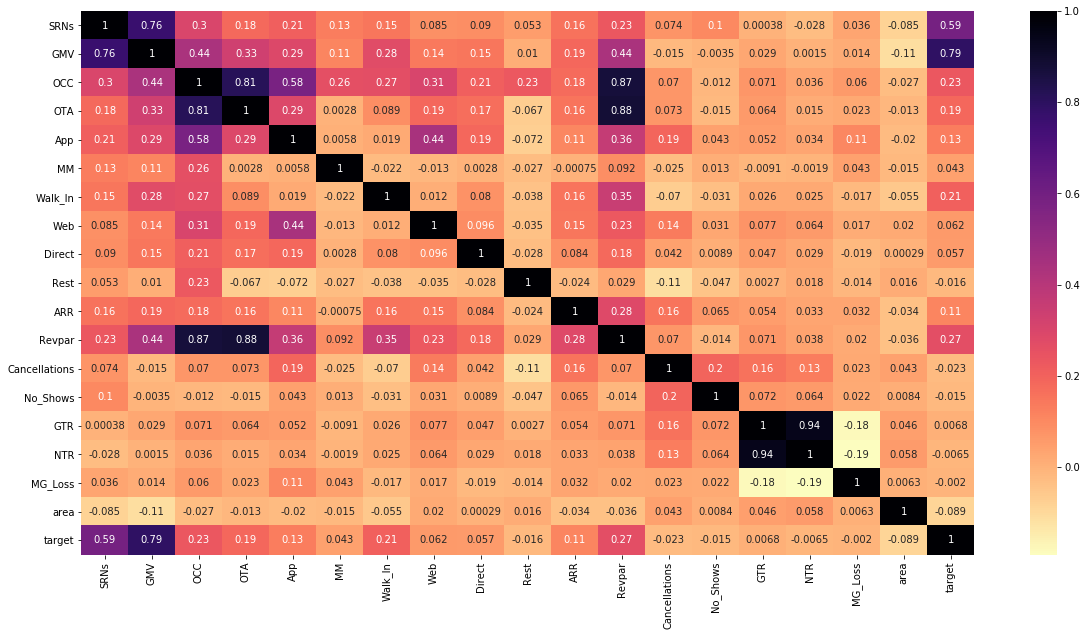

In [20]:
plt.figure(figsize=(20,10))
sb.heatmap(dfoyo.corr(),annot=True,cmap="magma_r")
plt.show()

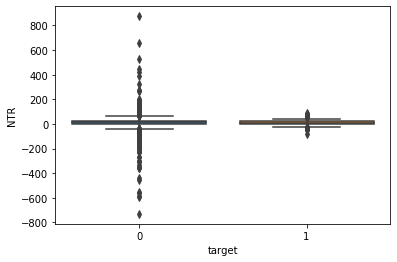

In [69]:
# dfoyo.dtypes
sb.boxplot(x='target',y='NTR', data=dfoyo)


In [70]:
dfoyo.columns

Index(['SRNs', 'GMV', 'OCC', 'OTA', 'App', 'MM', 'Walk_In', 'Web', 'Direct',
       'Rest', 'ARR', 'Revpar', 'Cancellations', 'No_Shows', 'GTR', 'NTR',
       'MG_Loss', 'area', 'target', 'RFreg'],
      dtype='object')

In [23]:
col = [ 'OCC', 'OTA', 'App', 'MM', 'Walk_In', 'Web', 'Direct',
       'Rest', 'Cancellations', 'No_Shows', 'GTR', 'NTR',
       'MG_Loss']

In [24]:
for i in col:
    dfoyo[i] = round(dfoyo[i]*100,2)

In [25]:
dfoyo.head()

,SRNs,GMV,OCC,OTA,App,MM,Walk_In,Web,Direct,Rest,ARR,Revpar,Cancellations,No_Shows,GTR,NTR,MG_Loss,area,target
0,1643,2.279401e+07,9.19,5.72,3.47,0.0,0.00,0.00,0.0,0.0,150962,13874,34.94,8.92,24.96,13.05,0.0,1,0
1,775,5.915414e+07,44.77,17.55,11.10,0.0,15.87,0.26,0.0,0.0,170489,76335,24.78,0.43,18.84,10.71,0.0,1,0
2,620,3.780094e+07,26.94,13.39,12.42,0.0,0.97,0.16,0.0,0.0,226315,60959,22.33,0.00,26.36,15.86,0.0,1,0
3,78,9.646701e+05,2.56,2.56,0.00,0.0,0.00,0.00,0.0,0.0,483108,12387,60.00,0.00,14.77,14.77,0.0,1,0
4,465,1.814553e+07,13.98,13.55,0.43,0.0,0.00,0.00,0.0,0.0,279132,39018,39.29,2.68,23.27,5.01,0.0,1,0


In [26]:
def findScore(model, paramXTest, paramYTest):
    yPred = model.predict(paramXTest)
    predDict = dict()
    
    print("Model: ", model)
    predDict['Model'] = model
    
    tn, fn, fp, tp = confusion_matrix(paramYTest, yPred).ravel()
    print("\nTrue Positive: ", tp)
    print("True Negative: ", tn)
    print("False Positive: ", fp)
    print("False Negative: ", fn)
    print("\nBalanced Accuracy Score: ", balanced_accuracy_score(paramYTest, yPred))
    predDict['bACC'] = balanced_accuracy_score(paramYTest, yPred)
    print("ROC AUC Score: ", roc_auc_score(paramYTest, yPred, multi_class = 'ovo'))
    predDict['ROCAUC'] = roc_auc_score(paramYTest, yPred, multi_class = 'ovo')
    print("Classification Report: \n", classification_report(paramYTest, yPred)) 
    predDict['ClassificationRep'] = classification_report(paramYTest, yPred)
    print("\n")
    return predDict

#### Splitting Data Train and Test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
dfoyo['target'].value_counts()

0    3071
1     157
Name: target, dtype: int64

In [29]:
# Splitting the data
x = dfoyo.drop(columns=['target', 'GMV'])
y = dfoyo['target']
xtr,xts,ytr,yts = train_test_split(x,y,test_size=.2,random_state=42,stratify=y)

In [30]:
# Fitting 
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(solver='liblinear')
modelLR.fit(xtr,ytr)
modelLR.score(xts,yts)

0.8839009287925697

In [31]:
penalty = ['l1','l2','elasticnet','none']
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
max_iter = [1,10,100,1000,10000]
paramLR = {'penalty':penalty,'solver':solver,'max_iter':max_iter}

In [32]:
modelCVLR =RandomizedSearchCV(modelLR,paramLR, cv=5)

In [33]:
# deciding the best parameters
modelCVLR.fit(xtr,ytr)
modelCVLR.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 10}

In [34]:
# model after hyperparameter tuning
# modelLRNew = LogisticRegression(max_iter=10000,penalty='l1',solver='liblinear')
modelLRNew = modelCVLR.best_estimator_
modelLRNew.fit(xtr,ytr)
modelLRNew.score(xts,yts)
bestLRscore = findScore(modelLRNew,xts,yts)

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

True Positive:  0
True Negative:  615
False Positive:  31
False Negative:  0

Balanced Accuracy Score:  0.5
ROC AUC Score:  0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       615
           1       0.00      0.00      0.00        31

    accuracy                           0.95       646
   macro avg       0.48      0.50      0.49       646
weighted avg       0.91      0.95      0.93       646





In [35]:
# Using Decision Tree Classifier Model
from sklearn import tree
modelTree = tree.DecisionTreeClassifier()
print(modelTree.fit(xtr,ytr))
modelTree.score(xts,yts)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


0.9876160990712074

In [36]:
# Creating Parameters
splitter = ['best','random']
criterion = ['gini','entropy']
max_depth = [10,20,30,40,'none']
param = {'splitter':splitter,'criterion':criterion,'max_depth':max_depth}

In [37]:
modelCVTree =RandomizedSearchCV(modelTree,param, cv=5)

In [38]:
# deciding the best parameters
modelCVTree.fit(xtr,ytr)
modelCVTree.best_params_

{'splitter': 'best', 'max_depth': 20, 'criterion': 'gini'}

In [39]:
# Getting the best score for Decision Tree Model after using Hyperparameter Tuning
# modelTreeNew = tree.DecisionTreeClassifier(criterion='entropy',max_depth=30,splitter='best')
modelTreeNew= modelCVTree.best_estimator_
modelTreeNew.fit(xtr,ytr)
modelTreeNew.score(xts,yts)
bestTreeScore = findScore(modelTreeNew,xts,yts)

Model:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

True Positive:  28
True Negative:  611
False Positive:  3
False Negative:  4

Balanced Accuracy Score:  0.9483608707054813
ROC AUC Score:  0.9483608707054814
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       615
           1       0.88      0.90      0.89        31

    accuracy                           0.99       646
   macro avg       0.94      0.95      0.94       646
weighted avg       0.99      0.99      0.99       646





<hr>

In [40]:
# Using Random Forest Classifier
modelRF = RandomForestClassifier()
print(modelRF.fit(xtr,ytr))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [41]:
# Using Hyperparameter Tuning

# Creating Parameters
n_estimators = list(range(10, 100, 5))
criterion = ['gini']
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param = {'n_estimators':n_estimators,'criterion':criterion,'max_features':max_features,'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf,'bootstrap' : bootstrap}

In [42]:
modelRFCV =RandomizedSearchCV(modelRF,param, cv=5)

In [43]:
# Getting best parameters
modelRFCV.fit(xtr,ytr)
modelRFCV.best_params_

{'n_estimators': 95,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'criterion': 'gini',
 'bootstrap': False}

In [44]:
# Getting the best score for Decision Tree Model after using Hyperparameter Tuning
# modelRFbest = RandomForestClassifier(n_estimators= 85,
#  min_samples_split = 10,
#  min_samples_leaf = 1,
#  max_features = 'sqrt',
#  criterion = 'gini',
#  bootstrap = True)
modelRFbest = modelRFCV.best_estimator_
modelRFbest.fit(xtr,ytr)
modelRFbest.score(xts,yts)
bestRFScore = findScore(modelRFbest,xts,yts)

Model:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=95,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

True Positive:  27
True Negative:  614
False Positive:  4
False Negative:  1

Balanced Accuracy Score:  0.9346708628376607
ROC AUC Score:  0.9346708628376608
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       615
           1       0.96      0.87      0.92        31

    accuracy                           0.99       646
   macro avg       0.98      0.93      0.96

#### Determining the diffrence before and after set the Hyperparameter tuning

In [45]:
log_0= round(modelLR.score(xts,yts)*100,2)
log_1 = round(modelLRNew.score(xts,yts)*100,2)

print('Logistic regression with default parameter',log_0,'%')
print('Logistic regression with hyperparameter tuning',log_1,'%')
print('After tuning, accuracy improve by around',round(log_1-log_0,2),'%')

Logistic regression with default parameter 88.39 %
Logistic regression with hyperparameter tuning 95.2 %
After tuning, accuracy improve by around 6.81 %


In [46]:
tree_0 = round(modelTree.score(xts,yts)*100,2)
tree_1 = round(modelTreeNew.score(xts,yts)*100,2)

print('Decision tree with default parameter',tree_0,'%')
print('Decision tree with hyperparameter tuning',tree_1,'%')
print('After tuning, improve by around',round(tree_1-tree_0,2),'%')

Decision tree with default parameter 98.76 %
Decision tree with hyperparameter tuning 98.92 %
After tuning, improve by around 0.16 %


In [47]:
RF_0 = round(modelRF.score(xts,yts)*100,2)
RF_1 = round(modelRFbest.score(xts,yts)*100,2)

print('Random forest with default parameter',RF_0,'%')
print('Random forest with hyperparameter tuning',RF_1,'%')
print('After tuning, improve by around',round(RF_1-RF_0,2),'%')


Random forest with default parameter 98.92 %
Random forest with hyperparameter tuning 99.23 %
After tuning, improve by around 0.31 %


In [48]:
from sklearn.metrics import plot_confusion_matrix

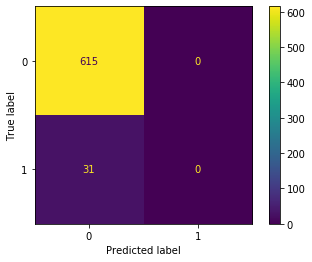

In [49]:
# Logistic regression after Hyperparameter tuning plot
plot_confusion_matrix(modelLRNew,xts,yts,values_format='0.0f')
plt.show()

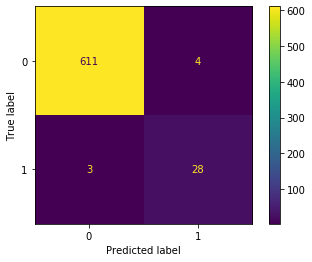

In [50]:
# Decision Tree after Hyperparameter tuning plot
plot_confusion_matrix(modelTreeNew,xts,yts,values_format='0.0f')
plt.show()

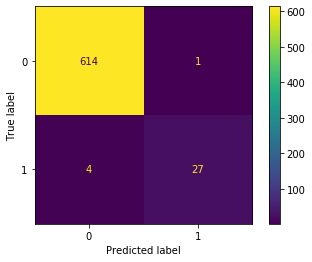

In [51]:
# Random Forest after Hyperparameter tuning plot
plot_confusion_matrix(modelRFbest,xts,yts,values_format='0.0f')
plt.show()

In [52]:
# Determine the feature importance
feature_imp = pd.DataFrame(modelTreeNew.feature_importances_, columns = ['Percentage'], index = x.columns)
feature_imp.sort_values(ascending=False, by='Percentage')[:6]

,Percentage
Revpar,0.486996
SRNs,0.453912
Walk_In,0.019892
GTR,0.009387
OTA,0.007569
MG_Loss,0.006258


In [53]:
# Splitting and modelling after using the only important features
x1 =  xtr[['Revpar','SRNs','Walk_In','GTR','Web','OTA']]
x2 = xts[['Revpar','SRNs','Walk_In','GTR','Web','OTA']]
# x1 =  xtr.drop(columns='GMV')
# x2 = xts.drop(columns='GMV')
# y = dfoyo['target']
# modelTreeNew
modelTreeNew.fit(x1,ytr)
modelTreeNew.score(x2,yts)
bestTreeScore = findScore(modelTreeNew,x2,yts)

Model:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

True Positive:  29
True Negative:  612
False Positive:  2
False Negative:  3

Balanced Accuracy Score:  0.9653029110936271
ROC AUC Score:  0.9653029110936271
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       615
           1       0.91      0.94      0.92        31

    accuracy                           0.99       646
   macro avg       0.95      0.97      0.96       646
weighted avg       0.99      0.99      0.99       646





In [54]:
# Plot the confusion Matrix

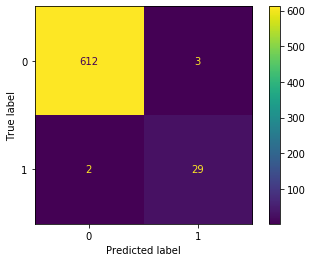

In [55]:
plot_confusion_matrix(modelTreeNew,x2,yts,values_format='0.0f')
plt.show()

In [56]:
# joblib.dump(modelTreeNew, 'model_tree')


<hr>

#### Determine the best Gross Take Rate


In [57]:
# Using Random Forest Regressor
x1 = dfoyo[['OCC','ARR','SRNs']]
x2 = dfoyo['GTR']
xtr1,xts1,ytr1,yts1 = train_test_split(x1,x2, test_size=0.8)

In [58]:
modelreg = RandomForestRegressor(n_estimators=10,random_state=42)
modelreg.fit(x1,x2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [59]:
dfoyo['RFreg'] = modelreg.predict(x1)

In [60]:
print("MAE:",round(mean_absolute_error(dfoyo['GTR'],dfoyo['RFreg']),2))
print("MSE:",round(mean_squared_error(dfoyo['GTR'],dfoyo['RFreg']),2))
print("RMSE:",np.sqrt(round(mean_squared_error(dfoyo['GTR'],dfoyo['RFreg']),2)))
print("R2 Score:",round(r2_score(dfoyo['GTR'],dfoyo['RFreg']),2))

MAE: 8.71
MSE: 562.92
RMSE: 23.725935176510955
R2 Score: 0.8


In [61]:
# joblib.dump(modelreg, 'model_linear')
